In [1]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("comentarios_deportivos.csv")

# Asegurar que los comentarios sean texto
df['comentario'] = df['comentario'].astype(str)

# Vista rápida
df.head()


,id,comentario,sentimiento
0,180,"Partido equilibrado, resultado justo.",Neutral
1,177,"Encuentro equilibrado, reparto justo de puntos.",Neutral
2,189,Resultado esperado dadas las circunstancias.,Neutral
3,132,Nuestro ataque no generó peligro suficiente.,Negativo
4,148,"Sin sobresaltos, rendimiento promedio.",Neutral


In [2]:
import re

# Función simple y efectiva para limpiar texto
def limpiar_texto_simple(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", "", texto)  # Solo letras y espacios
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto

# Aplicar limpieza
df['comentario_limpio'] = df['comentario'].apply(limpiar_texto_simple)

# Revisar ejemplos
df[['comentario', 'comentario_limpio']].sample(10)


,comentario,comentario_limpio
23,Excelente rendimiento de todo el equipo.,excelente rendimiento de todo el equipo
143,Rendimiento estable en defensa y ataque.,rendimiento estable en defensa y ataque
186,"Sin sobresaltos, rendimiento promedio.",sin sobresaltos rendimiento promedio
63,El equipo pareció desorganizado en todo momento.,el equipo pareció desorganizado en todo momento
56,"Mal partido, fallamos demasiadas oportunidades.",mal partido fallamos demasiadas oportunidades
92,Controlamos claramente el ritmo del partido.,controlamos claramente el ritmo del partido
42,Nuestro portero estuvo sobresaliente.,nuestro portero estuvo sobresaliente
40,Ambos equipos tuvieron oportunidades.,ambos equipos tuvieron oportunidades
167,"Mal partido, fallamos demasiadas oportunidades.",mal partido fallamos demasiadas oportunidades
48,Errores constantes en pases y posesión.,errores constantes en pases y posesión


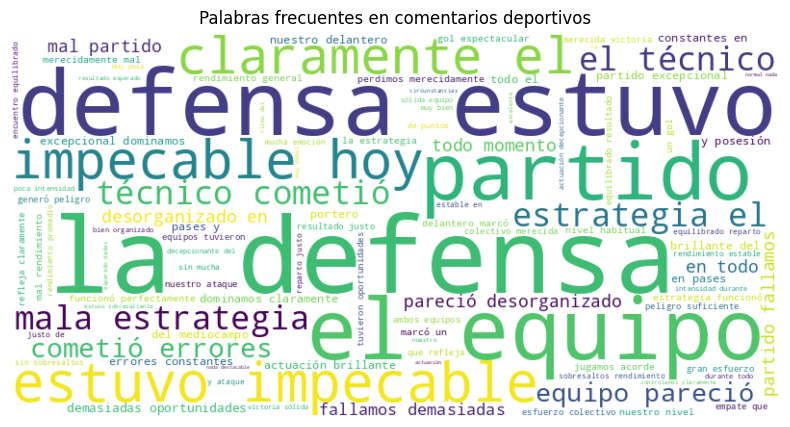

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrar comentarios útiles
df_filtrado = df[df['comentario_limpio'].str.strip().astype(bool)]

# Unir todos los comentarios limpios
texto_total = ' '.join(df_filtrado['comentario_limpio'])

# Generar nube
if texto_total:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Palabras frecuentes en comentarios deportivos")
    plt.show()
else:
    print("⚠️ No hay palabras útiles después del preprocesamiento.")


/var/folders/bg/pd8rtwgx4g36zn_rz90ljk200000gn/T/ipykernel_69292/2968625433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimiento', data=df, palette='viridis')


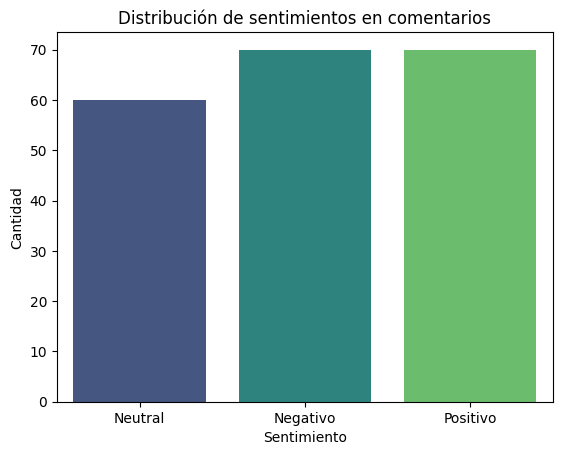

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar columna
if 'sentimiento' in df.columns:
    sns.countplot(x='sentimiento', data=df, palette='viridis')
    plt.title('Distribución de sentimientos en comentarios')
    plt.xlabel('Sentimiento')
    plt.ylabel('Cantidad')
    plt.show()
else:
    print("⚠️ No se encontró la columna 'sentimiento'.")


In [6]:
import ipywidgets as widgets
from IPython.display import display

sentimiento_widget = widgets.Dropdown(options=df['sentimiento'].unique(), description='Sentimiento:')

def mostrar_comentarios(sentimiento):
    seleccionados = df[df['sentimiento'] == sentimiento]
    display(seleccionados[['comentario', 'comentario_limpio']].sample(5))

widgets.interactive(mostrar_comentarios, sentimiento=sentimiento_widget)



interactive(children=(Dropdown(description='Sentimiento:', options=('Neutral', 'Negativo', 'Positivo'), value=…